In [1]:
%load_ext autoreload
%autoreload 2

In [95]:
import sys
import subprocess
import os
import pandas as np
import numpy as np
import pathlib
import re
import glob
import pandas as pd
from pprint import pprint
module_path = "/Users/jmccarty/Data/221205_ipv_workbench/github/IPV_Workbench"
sys.path.insert(0, module_path)
import workbench
from workbench.utilities import general, config_utils, temporal, io
from workbench.manage import manage, host, results_writers

# from workbench.manage import host
from workbench.workflows import workflows
from workbench.simulations import method_iv_solver, method_topology_solver
from workbench.visualize import plots as ipv_plot
from workbench.utilities import constants
from workbench.device import stringer


In [3]:
# because we have restarted our notebook we will reactivate our project by reading in the config path
# place your config path here
config_path = "/Users/jmccarty/Data/221205_ipv_workbench/tutorials/cactus_tutorial/cactus_tutorial.config"
project_manager = manage.Project(config_path)

# rerun the setup in order to rebuild the entire project object and its attributes
project_manager.project_setup()


Destination file already exists, copy aborted./n/Users/jmccarty/Data/221205_ipv_workbench/tutorials/cactus_tutorial/inputs/shared/tmy/base.epw
Destination file already exists, copy aborted./n/Users/jmccarty/Data/221205_ipv_workbench/tutorials/cactus_tutorial/inputs/hosts/B1008/base/geometry/0_cactus_geometry_template.3dm
Destination file already exists, copy aborted./n/Users/jmccarty/Data/221205_ipv_workbench/tutorials/cactus_tutorial/inputs/hosts/B1008/base/geometry/0_cactus_geometry_template.gh
Destination file already exists, copy aborted./n/Users/jmccarty/Data/221205_ipv_workbench/tutorials/cactus_tutorial/inputs/hosts/B1008/base/geometry/1_cactus_panelizer_template.gh
The project is initialized. We have created a base host object named 'B1008'.
You will need to either move or create the geometry and panelizer files into the appropriate directories.
The geometry files should follow the convention defined in the output of the template grasshopper and rhino files.
The panelizer files

In [4]:
building = host.Host(project_manager)

In [72]:
building.string_building()

In [45]:
surface = building.get_surfaces()[10]
building.get_dict_instance([surface])['Strings']

KeyboardInterrupt: 

In [75]:
building.write_key_parameters()

In [7]:
building.solve_all_modules_iv_curve(surface)

In [77]:
string_key = "b"
modules = building.get_modules_on_string(surface, string_key)
modules

['{1008;0;33}',
 '{1008;0;15}',
 '{1008;0;19}',
 '{1008;0;94}',
 '{1008;0;47}',
 '{1008;0;23}',
 '{1008;0;102}',
 '{1008;0;86}',
 '{1008;0;110}',
 '{1008;0;64}',
 '{1008;0;48}',
 '{1008;0;44}',
 '{1008;0;41}',
 '{1008;0;51}',
 '{1008;0;72}',
 '{1008;0;25}',
 '{1008;0;118}',
 '{1008;0;10}',
 '{1008;0;56}',
 '{1008;0;78}',
 '{1008;0;43}',
 '{1008;0;7}']

In [74]:
building.solve_all_string_iv_curves(surface)

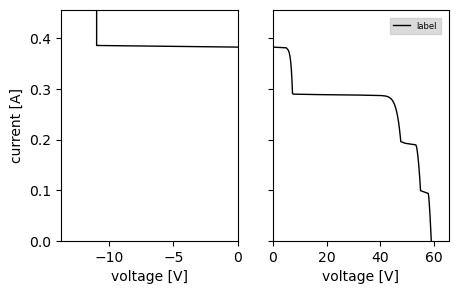

In [15]:
ipv_plot.plot_curves([building.get_dict_instance([surface])['Strings'][string_key]['Curves']['Istr'][12]],
                     [building.get_dict_instance([surface])['Strings'][string_key]['Curves']['Vstr'][12]],
                     building.get_dict_instance([surface, modules[0]])['Parameters'])


In [92]:
# pd.Series(building.get_dict_instance([surface,'{1008;0;33}'])['Yield']['initial_simulation']['irrad']).sum()

surface_irradiance_w = []

for module in modules:
    surface_irradiance_w.append(pd.Series(building.get_dict_instance([surface,module])['Yield']['initial_simulation']['irrad']))
    
pd.concat(surface_irradiance_w,axis=1).sum(axis=1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8755    0.0
8756    0.0
8757    0.0
8758    0.0
8759    0.0
Length: 8760, dtype: float64

In [38]:
method_topology_solver.solve_central_inverter_mpp(building, surface)

{0: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 1: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 2: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 3: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 4: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 5: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 6: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 7: {'imp': 0, 'vmp': 0, 'pmp': 0, 'ff': {}, 'irrad': 0.0, 'eff': 0},
 8: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'ff': {},
  'irrad': 25.264000000000003,
  'eff': 0.0},
 9: {'imp': 0.33,
  'vmp': 8.532,
  'pmp': 2.815,
  'ff': {},
  'irrad': 234.796,
  'eff': 0.01198913099030648},
 10: {'imp': 0.722,
  'vmp': 5.941,
  'pmp': 4.29,
  'ff': {},
  'irrad': 471.62699999999995,
  'eff': 0.009096171338791037},
 11: {'imp': 1.007,
  'vmp': 6.611,
  'pmp': 6.66,
  'ff': {},
  'irrad': 646.825,
  'eff': 0.0102964480

In [24]:
method_topology_solver.solve_string_inverter_mpp(building, surface, "b")

{0: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 1: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 2: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 3: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 4: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 5: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 6: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 7: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 0.0,
  'eff': 0},
 8: {'imp': 0,
  'vmp': 0,
  'pmp': 0,
  'isc': {},
  'voc': {},
  'ff': {},
  'irrad': 2.121,
  'eff': 0.0},
 9: {'imp': 0.092,
  'vmp': 44.687,
  'pmp

In [47]:
workflows.run_topology_solver(building, 'central_inverter')

In [65]:
building.sunup_array()

AttributeError: 'Host' object has no attribute 'sunup_array'

In [62]:
# for module in building.get_dict_instance([surface])['Modules'].keys():
building.get_dict_instance([surface])['Modules']['{1008;0;107}']['Parameters']['param_actual_capacity_Wp']

{'Unnamed: 0': 2,
 'general_device_summary': 'monoSi_singleJ_mini',
 'bishop_N_p_typical': 1.0,
 'bishop_N_s_typical': 14.0,
 'bishop_breakdown_exp': 3.0,
 'bishop_breakdown_factor': 0.002,
 'bishop_breakdown_voltage': -15.0,
 'desoto_bandgap_temp_coe_dEgdT': -0.0002677,
 'desoto_diode_factor_a_ref': 0.3683066504159941,
 'desoto_energy_bandgap_Egref': 1.121,
 'desoto_photocurrent_I_L_ref': 9.727748406385912,
 'desoto_saturation_current_I_o_ref': 2.6849264029571573e-11,
 'desoto_series_resist_R_s_ref': 0.0858924284539028,
 'desoto_short_circuit_temp_coe_alpha_sc': 0.00046,
 'desoto_shunt_resist_R_sh_ref': 134.77853986504812,
 'general_cell_area_mm2_typical': 25201.562,
 'general_cell_height_mm_typical': 158.75,
 'general_cell_type': 'monoSi',
 'general_cell_width_mm_typical': 158.75,
 'general_description': 'small monocrystalline module',
 'general_heterojunction': False,
 'general_monolithic': False,
 'module_n_subcell_cols_typical': 1.0,
 'module_n_subcell_rows_typical': 1.0,
 'module

In [145]:
r = results_writers.write_building_results_timeseries(building, 'central_inverter')

File containing electricity loads not found. Results that require this input will not be calculated
Saved results CSV to
/Users/jmccarty/Data/221205_ipv_workbench/tutorials/cactus_tutorial/outputs/B1008/base/general/base_central_inverter_building_level_results_hourly.csv.


In [146]:
building.project.analysis_temporal_resolution

1.0

In [144]:
r['electricity_gen_bulk_1008_0_west_kwh'].head(12)

index
2023-01-01 00:00:00    0.000
2023-01-01 01:00:00    0.000
2023-01-01 02:00:00    0.000
2023-01-01 03:00:00    0.000
2023-01-01 04:00:00    0.000
2023-01-01 05:00:00    0.000
2023-01-01 06:00:00    0.000
2023-01-01 07:00:00    0.000
2023-01-01 08:00:00    0.003
2023-01-01 09:00:00    0.003
2023-01-01 10:00:00    0.004
2023-01-01 11:00:00    0.007
Name: electricity_gen_bulk_1008_0_west_kwh, dtype: float64